In [2]:
import numpy as np
import matplotlib.pyplot as plt

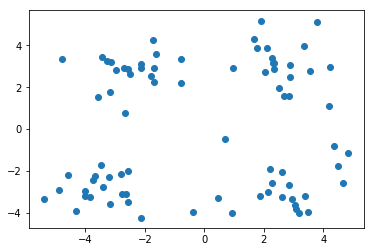

In [3]:
# 载入数据
data = np.genfromtxt("kmeans.txt", delimiter=" ")

plt.scatter(data[:,0],data[:,1])
plt.show()

In [4]:
# 计算距离
def euclDistance(vector1, vector2):
    return np.sqrt(sum((vector2 - vector1)**2))

# 初始化质心
def initCentroids(data, k):
    numSamples, dim = data.shape
    # k个质心，列出跟样本的列数一样
    centroids = np.zeros((k, dim))
    # 随机选出k个质心
    for i in range(k):
        # 随机选出一个样本的索引
        index = int(np.random.uniform(0, numSamples))
        # 作为初始化质心
        centroids[i, :] = data[index, :]
    return centroids

# 传入数据集和k的值
def kmeans(data, k):
    # 计算样本个数
    numSamples = data.shape[0]
    # 样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
    clusterData = np.array(np.zeros((numSamples, 2)))
    # 决定质心是否要改变的变量
    clusterChanged = True
    
    # 初始化质心
    centroids = initCentroids(data, k)
    
    while clusterChanged:
        clusterChanged = False
        # 循环每一个样本
        for i in range(numSamples):
            # 最小距离
            minDist = 100000.0
            # 定义样本所属的簇
            minIndex = 0
            # 循环每一个质心和样本，计算距离
            for j in range(k):
                # 循环每一个质心和样本
                distance = euclDistance(centroids[j, :], data[i, :])
                # 如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist:
                    minDist = distance
                    # 更新最小距离
                    clusterData[i, 1] = minDist
                    # 更新样本所属的簇
                    minIndex = j
                
            # 如果样本的所属的簇发生了变化
            if clusterData[i, 0] != minIndex:
                # 质心要重新计算
                clusterChanged = True
                # 更新样本的簇
                clusterData[i, 0] = minIndex
            
        # 更新质心
        for j in range(k):
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            # 计算质心
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)
#        showCluster(data, k, centroids, clusterData)

    return centroids, clusterData

# 显示结果
def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim != 2:
        print("dimension of yoour data is not 2!")
        return 1
    
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r','pr']
    if k > len(mark):
        print("Your k is too large！")
        return 1
    
    # 画样本点
    for i in range(numSamples):
        markIndex = int(clusterData[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])
        
    # 用不同颜色形状来表示各个形状
    mark = ['*r', '*b', '*g', '*k', '^b', 'sb', 'db', '<b', 'pb']
    # 画质心点
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)
        
    plt.show()

In [5]:
list_lost = []
for k in range(2,10):
    min_loss = 10000000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])
    for i in range(50):
        # centrtroids 簇的中心点
        # cluster Data样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
        centroids, clusterData = kmeans(data, k)
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_lost.append(min_loss)
# print('cluster complete!')
# centrodis = min_loss_centroids
# cluster = min_loss_clusterData

# 显示结果
# showCluster(data, k, centroids, clusterData)

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [20]:
list_lost

[2.9811811738953176,
 1.9708559728104191,
 1.1675654672086735,
 1.0712368269135584,
 1.0070467279803759,
 0.9419374627997341,
 0.8790597068923827,
 0.8488704187445169]

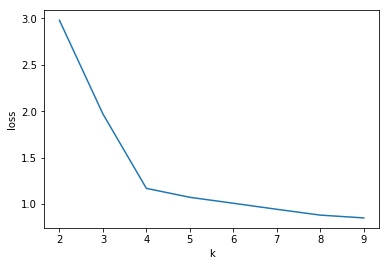

In [21]:
plt.plot(range(2,10),list_lost)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()